In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
# read a dataset from url for polynomial regression 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
data = pd.read_csv(url, header=None)

In [3]:
# create a pipeline for polynomial regression like a function
def polynomial_regression(degree):
    # create x and y
    X = data.iloc[:, :-1].values  # all columns except last
    y = data.iloc[:, -1].values   # last column
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('lin_reg', LinearRegression())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # graph for actual vs predicted
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Polynomial Regression (degree={degree})\nMSE: {mse:.2f}, R2: {r2:.2f}")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.show()
    return pipeline, mse, r2

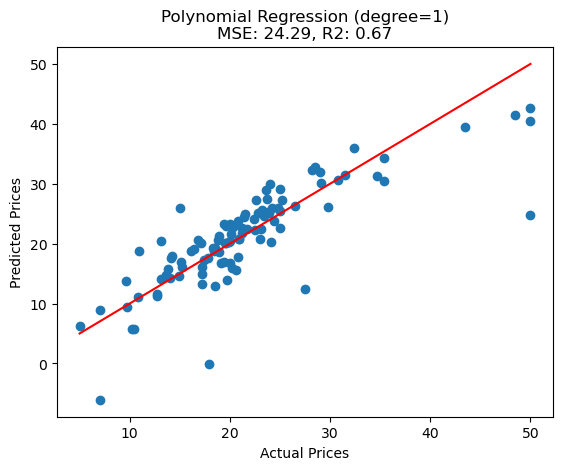

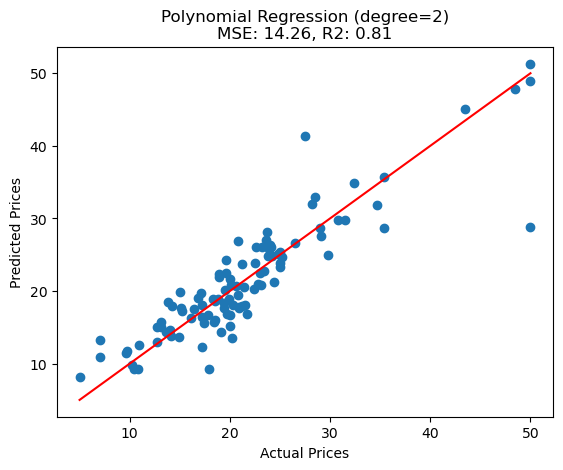

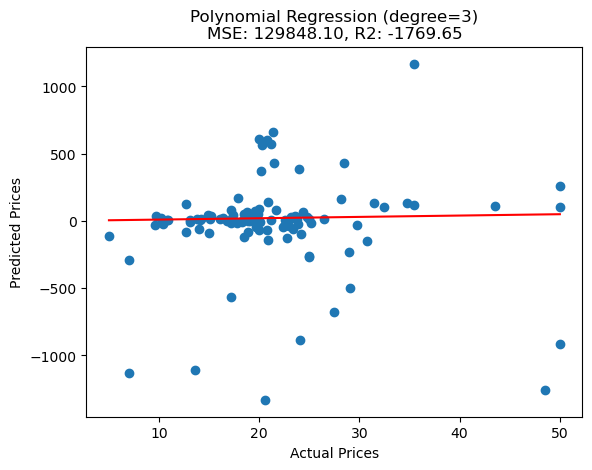

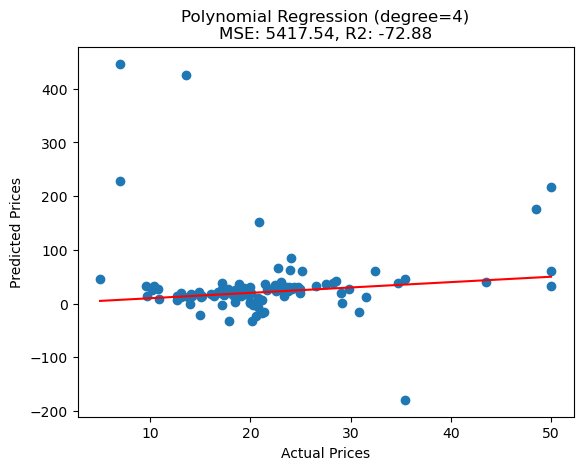

In [4]:
for i in range(1, 5):
    model, mse, r2 = polynomial_regression(degree=i)